本章内容：
- 理解卷积神经网络
- 使用数据增强来降低过拟合
- 使用与训练的卷积神经网络进行特征提取
- 微调预训练的卷积神经网络
- 将卷积神经网络学习到的内容及其如何做出分类决策可视化

实例化一个小型卷积神经网络

In [5]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


添加分类器

In [5]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

在MNIST图像上训练卷积神经网络

In [17]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

train_images = train_images.reshape((60000,28,28,1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=5,batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 35s 592us/step - loss: 0.1753 - acc: 0.9442
Epoch 2/5
60000/60000 [==============================] - 41s 681us/step - loss: 0.0469 - acc: 0.9850
Epoch 3/5
60000/60000 [==============================] - 38s 629us/step - loss: 0.0315 - acc: 0.9902
Epoch 4/5
60000/60000 [==============================] - 46s 773us/step - loss: 0.0241 - acc: 0.9925
Epoch 5/5
60000/60000 [==============================] - 49s 818us/step - loss: 0.0194 - acc: 0.9942


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# dogs vs cats

将图像复制到训练、验证和测试目录

In [10]:
import os,shutil  #shutil Python文件操作模块

original_dataset_dir = '/Users/liuhuan/Downloads/kaggle/train' # 原始数据集解压目录的路径

base_dir = '/Users/liuhuan/Downloads/cats_and_dogs_small' # 保存较小数据集的目录
# os.mkdir(base_dir)

# 对应划分后的训练、验证和测试目录
train_dir = os.path.join(base_dir,'train')
# os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation')
# os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test')
# os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir,'cats') # 猫的训练图像目录
# os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir,'dogs') # 狗的训练图像目录
# os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir,'cats') # 猫的验证图像目录
# os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir,'dogs') # 狗的验证图像目录
# os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir,'cats') # 猫的测试图像目录
# os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir,'dogs') # 狗的测试图像目录
# os.mkdir(test_dogs_dir)

# #将前1000张猫的图像复制到train_cats_dir
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir,fname)
#     dst = os.path.join(train_cats_dir,fname)
#     shutil.copyfile(src,dst)

# #将前500张猫的图像复制到validation_cats_dir
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir,fname)
#     dst = os.path.join(validation_cats_dir,fname)
#     shutil.copyfile(src,dst)
    
# #将前500张猫的图像复制到test_cats_dir
# fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir,fname)
#     dst = os.path.join(test_cats_dir,fname)
#     shutil.copyfile(src,dst)
    
# #将前1000张狗的图像复制到train_dogs_dir
# fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir,fname)
#     dst = os.path.join(train_dogs_dir,fname)
#     shutil.copyfile(src,dst)

# #将前500张狗的图像复制到validation_dogs_dir
# fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir,fname)
#     dst = os.path.join(validation_dogs_dir,fname)
#     shutil.copyfile(src,dst)
    
# #将前500张狗的图像复制到test_dogs_dir
# fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir,fname)
#     dst = os.path.join(test_dogs_dir,fname)
#     shutil.copyfile(src,dst)


## 构建网络

In [3]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

## 配置模型用于训练

In [5]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## 数据预处理
1. 读取图像文件
2. 将JPEG文件解码为RGB像素网格
3. 像素网格转换为浮点数张量
4. 将像素值缩放到[0,1]区间

使用ImageDataGenerator从目录中读取图像

In [6]:
from keras.preprocessing.image import ImageDataGenerator

#将所有像素乘以1/255缩放
train_datagen = ImageDataGenerator(rescale=1/255) 
test_datagen = ImageDataGenerator(rescale=1/255)

#训练集
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150,150), #调整图像大小
        batch_size=20,
        class_mode='binary'
)

#验证集
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='binary'
)

NameError: name 'train_dir' is not defined

In [12]:
for data_batch,labels_batch in train_generator:
    print('data batch shape:',data_batch.shape)
    print('labels batch shape:',labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [2]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=50
)

#保存模型
model.save('cats_and_dogs_small_1.h5')

NameError: name 'model' is not defined

In [1]:
# 绘制训练过程中的损失曲线和精度曲线
import matplotlib.pyplot as plt
%matplotlib
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and Validation accuracy')
plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Using matplotlib backend: MacOSX


NameError: name 'history' is not defined

### 数据增强

In [8]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
)

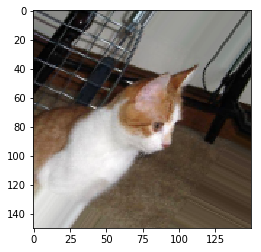

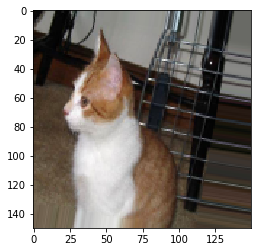

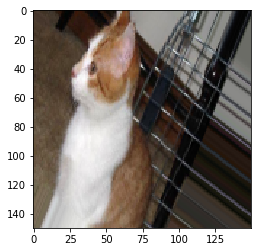

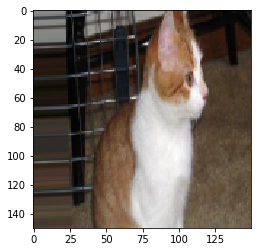

In [18]:
# 显示几个增强后的训练图像
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[0]

img = image.load_img(img_path,target_size=(150,150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

## 定义一个包含dropout的新卷积网络

In [3]:
from keras import layers
from keras import optimizers


model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten()) #展开层
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

#模型编译
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])


Using TensorFlow backend.


NameError: name 'models' is not defined

In [4]:

# 利用数据增强生成器训练卷积神经网络
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale= 1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1. / 255) # 不能增强验证数据

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150,150),
        batch_size = 32,
        class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150), 
        batch_size=32, 
        class_mode='binary'
)

history = model.fit_generator(
        train_generator,
        steps_per_epoch=10,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=50
)

# 保存模型
model.save('cats_and_dogs_small_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


NameError: name 'model' is not defined

In [1]:
# 绘制训练过程中的损失曲线和精度曲线
import matplotlib.pyplot as plt
%matplotlib
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and Validation accuracy')
plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Using matplotlib backend: MacOSX


NameError: name 'history' is not defined

# 预训练的卷积神经网络

In [1]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150,150,3))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [7]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [10]:
# 不适用数据增强的快速特征提取
import os 
import numpy as np 
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/Users/liuhuan/Downloads/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train') 
validation_dir = os.path.join(base_dir, 'validation') 
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_feature(direcory,sample_count):
    features = np.zeros(shape=(sample_count,4,4,512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        direcory,
        target_size=(150,150),
        batch_size=batch_size,
        class_mode='binary'
    )
    
    i = 0
    for input_batch,labels_batch in generator:
        features_batch = conv_base.predict(input_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features,labels

train_features,train_labels = extract_feature(train_dir,2000)
validation_features,validation_labels = extract_feature(validation_dir,1000)
test_features,test_labels = extract_feature(test_dir,1000)

# 形状展平
train_features = np.reshape(train_features,(2000,4*4*512))
validation_features = np.reshape(validation_features,(1000,4*4*512))
test_features = np.reshape(test_features,(1000,4*4,512))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
# 定义并训练密集连接分类器
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256,activation='relu',input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(
        train_features,
        train_labels,
        epochs=30,
        batch_size=20,
        validation_data=(validation_features,validation_labels)
)

Instructions for updating:
Use tf.cast instead.
Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.5828 - acc: 0.6930 - val_loss: 0.4315 - val_acc: 0.8520
Epoch 2/30
2000/2000 [==============================] - 2s 981us/step - loss: 0.4321 - acc: 0.7950 - val_loss: 0.3558 - val_acc: 0.8740
Epoch 3/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.3617 - acc: 0.8495 - val_loss: 0.3170 - val_acc: 0.8810
Epoch 4/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.3214 - acc: 0.8645 - val_loss: 0.2938 - val_acc: 0.8860
Epoch 5/30
2000/2000 [==============================] - 2s 994us/step - loss: 0.2795 - acc: 0.8830 - val_loss: 0.2791 - val_acc: 0.8900
Epoch 6/30
2000/2000 [==============================] - 2s 992us/step - loss: 0.2641 - acc: 0.8885 - val_loss: 0.2670 - val_acc: 0.8910
Epoch 7/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.2454 - acc: 0.90

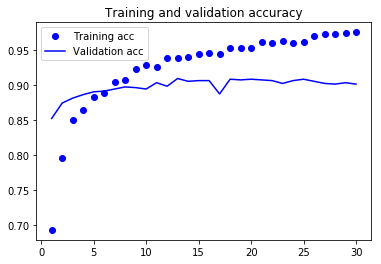

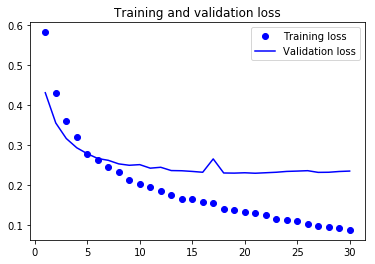

In [17]:
# 绘制结果
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

## 使用数据增强的特征提取

In [6]:
from keras import models
from keras import layers

conv_base.trainable = False
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [11]:
# 使用冻结的卷积端到端地训练模型
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40, 
        width_shift_range=0.2, 
        height_shift_range=0.2,
        shear_range=0.2, 
        zoom_range=0.2,
        horizontal_flip=True, 
        fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory( 
        validation_dir,
        target_size=(150, 150), 
        batch_size=20, 
        class_mode='binary')

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=2e-5),
    metrics=['acc']
)

# history = model.fit_generator(
#     train_generator,
#     steps_per_epoch=100,
#     epochs=30,
#     validation_data=validation_generator,
#     validation_steps=50
# )


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## 微调模型

In [2]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [12]:
# 冻结直到某一层的所有层

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [15]:
# 微调模型
from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

# 卷积网络可视化

## 可视化中间激活

In [5]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 34, 34, 128)       73856     
_______________________________________

In [2]:
# 预处理单张图片
img_path = '/Users/liuhuan/Downloads/cats_and_dogs_small/test/cats/cat.1700.jpg'

from keras.preprocessing import image 
import numpy as np

img = image.load_img(img_path,target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor,axis=0) #扩充维度
img_tensor /= 255.


Using TensorFlow backend.


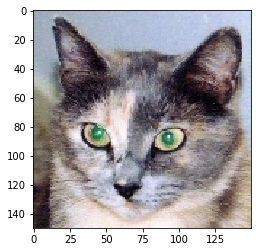

In [3]:
# 显示测试图像
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [6]:
# 用一个输入张量和一个输出张量列表将模型实例化

from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]
# 创建一个模型，给定模型输入，可以返回这些输出
activation_model = models.Model(inputs=model.input,outputs=layer_outputs) 

#以预测模式运行模型
activations = activation_model.predict(img_tensor)

In [28]:
activations[0].shape

(1, 148, 148, 32)

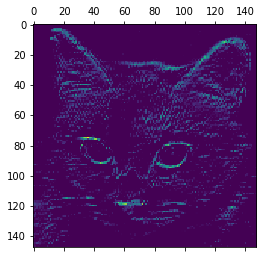

In [7]:
# 将第四个通道可视化
plt.matshow(activations[0][0,:,:,4],cmap='viridis')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide


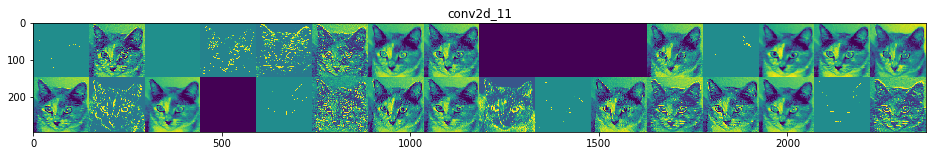

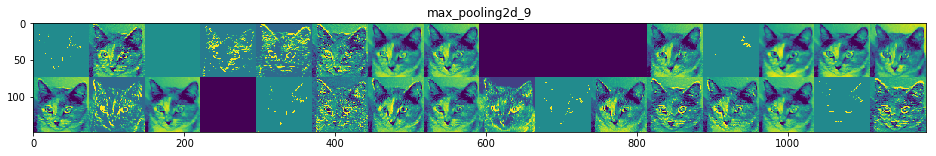

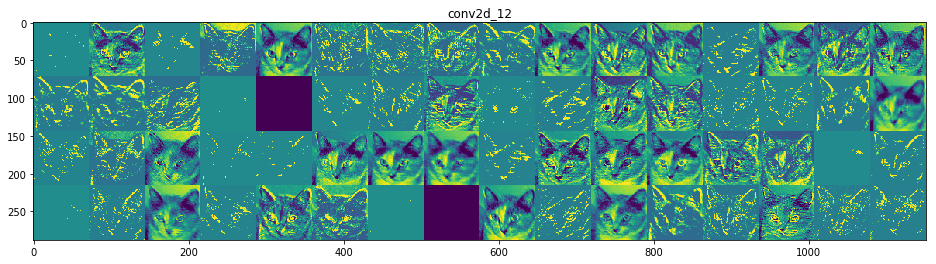

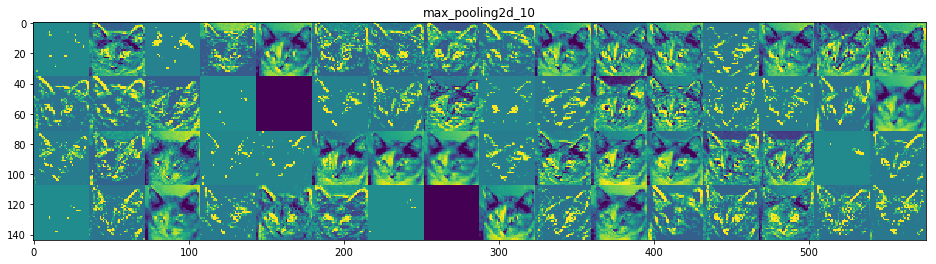

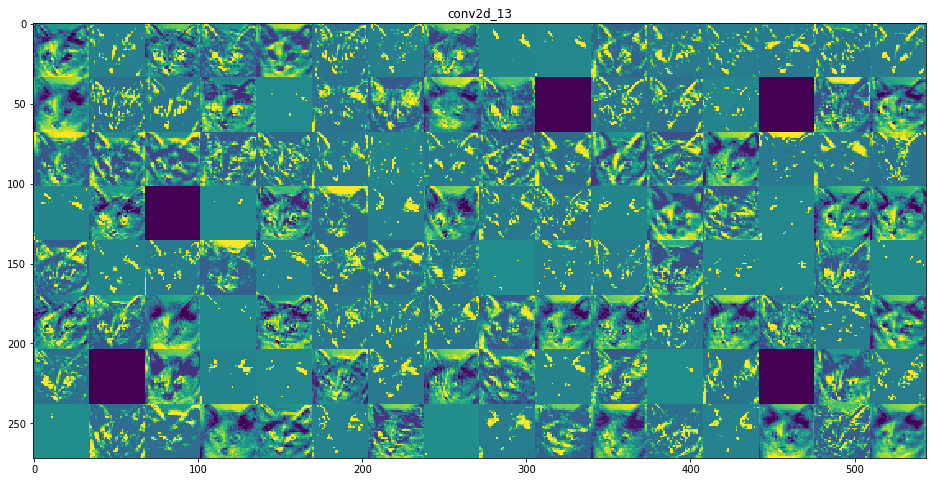

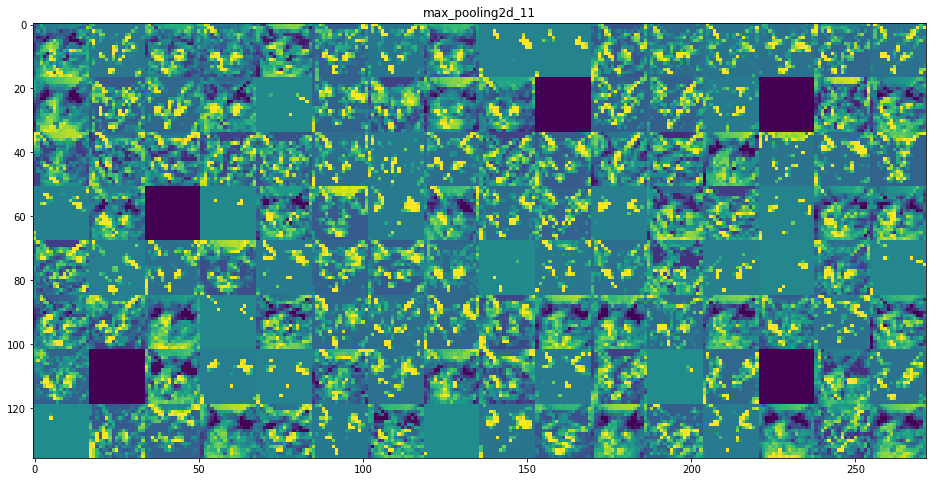

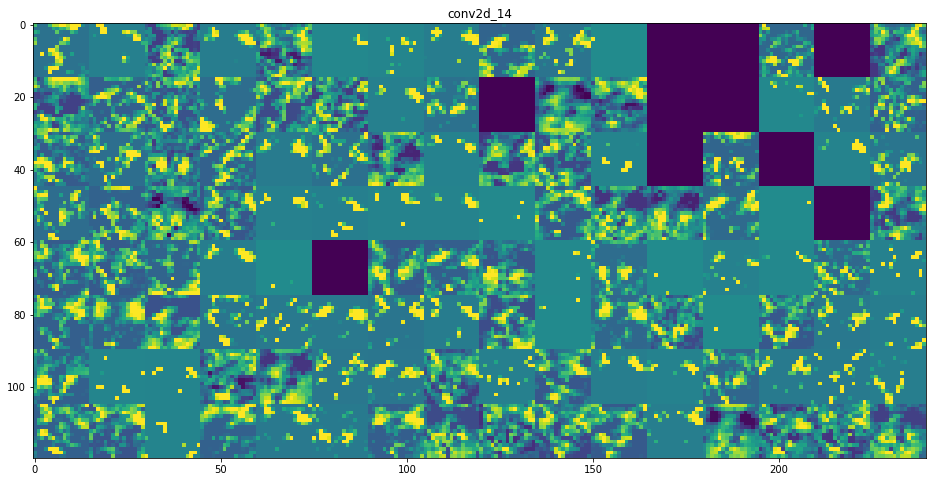

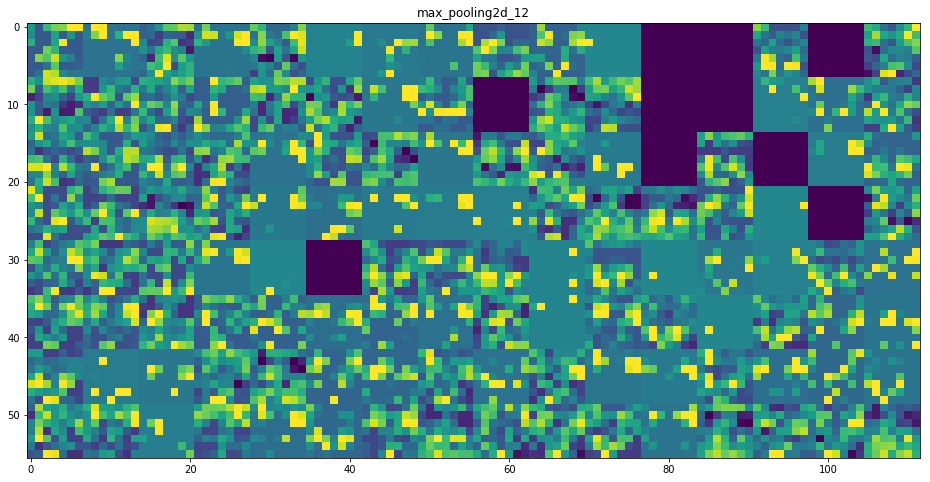

In [12]:
# 将每个中间激活的所有通道可视化
import keras

# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

In [14]:
# 可视化卷积神经网络的过滤器

# 为过滤器的可视化定义损失张量
from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights='imagenet',include_top=False)

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:,:,:,filter_index])

In [15]:
# 获取损失相对于输入的梯度
grads = K.gradients(loss,model.input)[0]

In [16]:
# 梯度标准化技巧
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

In [ ]:
# 给定numpy输入值，得到numpy输出值
iterate = K.function([model.input],[loss,grads])